<a href="https://colab.research.google.com/github/KArimCHidekh/Data_visualization/blob/main/Data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1** : le pay le plus polueur ces 5 dernieres années 
# **Type de Graphe : Bar chart et  aussi Line chart**


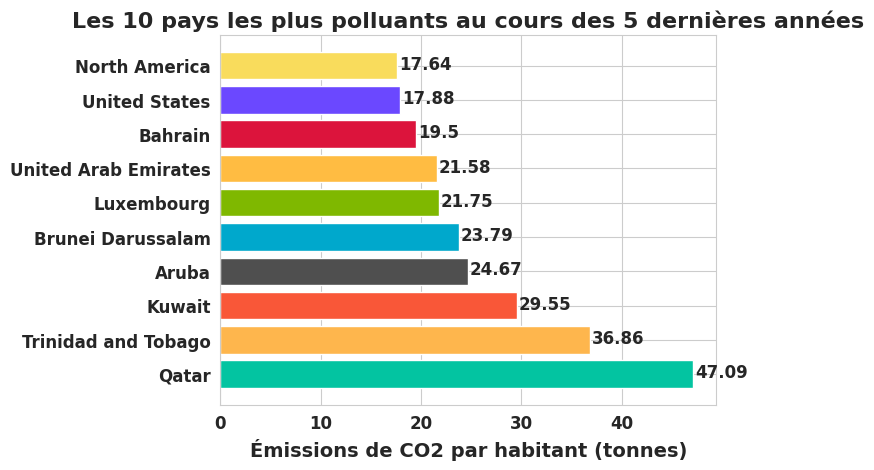

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('CO2_per_capita.csv' , sep=";")
df.columns = ["country_name", "country_code", "year", "co2"]

last_five_years = df[df["year"] >= 2007]
country_averages = last_five_years.groupby("country_name")["co2"].mean().reset_index()
sorted_countries = country_averages.sort_values("co2", ascending=False)

colors = ["#03C4A1", "#FEB64D", "#F95738", "#4F4F4F", "#00A8CC", "#7FB800", "#FFBC42", "#DC143C", "#6B48FF", "#F9DC5C"]


sns.set_style("whitegrid")


top_10 = sorted_countries.head(10)
plt.barh(top_10["country_name"], top_10["co2"], color=colors)
plt.xlabel("Émissions de CO2 par habitant (tonnes)", fontsize=14, fontweight="bold")
plt.ylabel("")
plt.xticks(fontsize=12, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold")
plt.title("Les 10 pays les plus polluants au cours des 5 dernières années", fontsize=16, fontweight="bold")

# Add value labels to the bars
for i, v in enumerate(top_10["co2"]):
    plt.text(v + 0.2, i - 0.1, str(round(v, 2)), fontsize=12, fontweight="bold")

plt.show()


# ------------------------------------------------------------------------------------------------------------------------------

#**2** : le pays le moins polueur en 2010
# Type de Graphe : scatter plot .

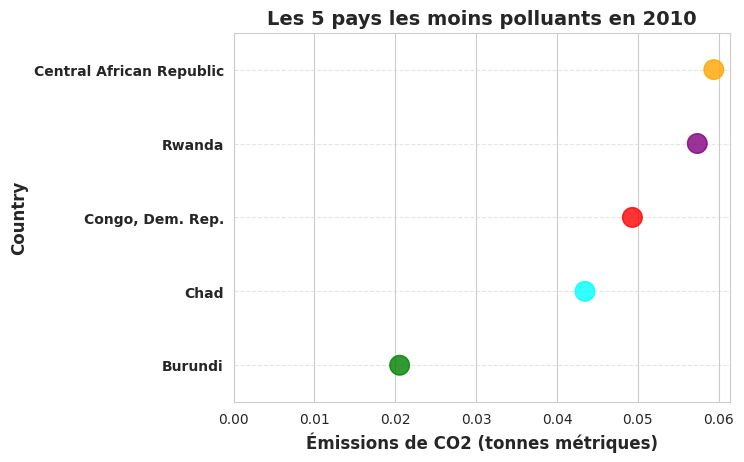

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as font_manager




df_2010 = df[df['year'] == 2010]

df_avg = df_2010.groupby('country_name')['co2'].mean().reset_index()


df_sorted = df_avg.sort_values('co2', ascending=True)


top_5 = df_sorted.head(5)

# Create a scatter plot that displays the calculated average CO2 emissions per capita for each country
colors = ['green', 'cyan', 'red', 'purple', 'orange']
plt.scatter(top_5['co2'], top_5['country_name'], s=200, alpha=0.8, c=colors)
plt.title('Les 5 pays les moins polluants en 2010', fontweight='bold', fontsize=14)
plt.xlabel('Émissions de CO2 (tonnes métriques)', fontweight='bold', fontsize=12)
plt.ylabel('Country', fontweight='bold', fontsize=12)
plt.xlim(left=0)  # Set the left boundary to 0
plt.ylim(bottom=-0.5, top=len(top_5['country_name'])-0.5)  # Set the y-axis limits
plt.yticks(ticks=range(len(top_5['country_name'])), labels=top_5['country_name'], fontweight='bold', fontsize=10)  # Set the y-axis labels
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Add horizontal grid lines
#plt.gca().xaxis.set_major_formatter(font_manager.FormatStrFormatter('%.1f'))  # Set the x-axis labels to one decimal place
plt.show()


# **3** :  le pays qui devrait faire le plus d'efforts en ce qui concerne l'emission de CO2
# Type de Graphe : Bar chart

# **4** : Comment les émissions de CO2 par habitant de chaque pays ont-elles évolué entre 1960 et 2011 ? Quels sont les pays dont les émissions ont le plus augmenté ou diminué au fil du temps ?

# Le graphique approprié pour visualiser ces données est un : **diagramme linéaire (Line Chart)**

dont l'axe des x représente les années et l'axe des y les émissions de CO2 par habitant de chaque pays. Chaque ligne du graphique représente un pays différent, et nous pouvons utiliser un code couleur pour regrouper les pays par région ou par d'autres facteurs pertinents et également utiliser des étiquettes pour identifier les pays dont les émissions ont le plus augmenté ou diminué au fil du temps.

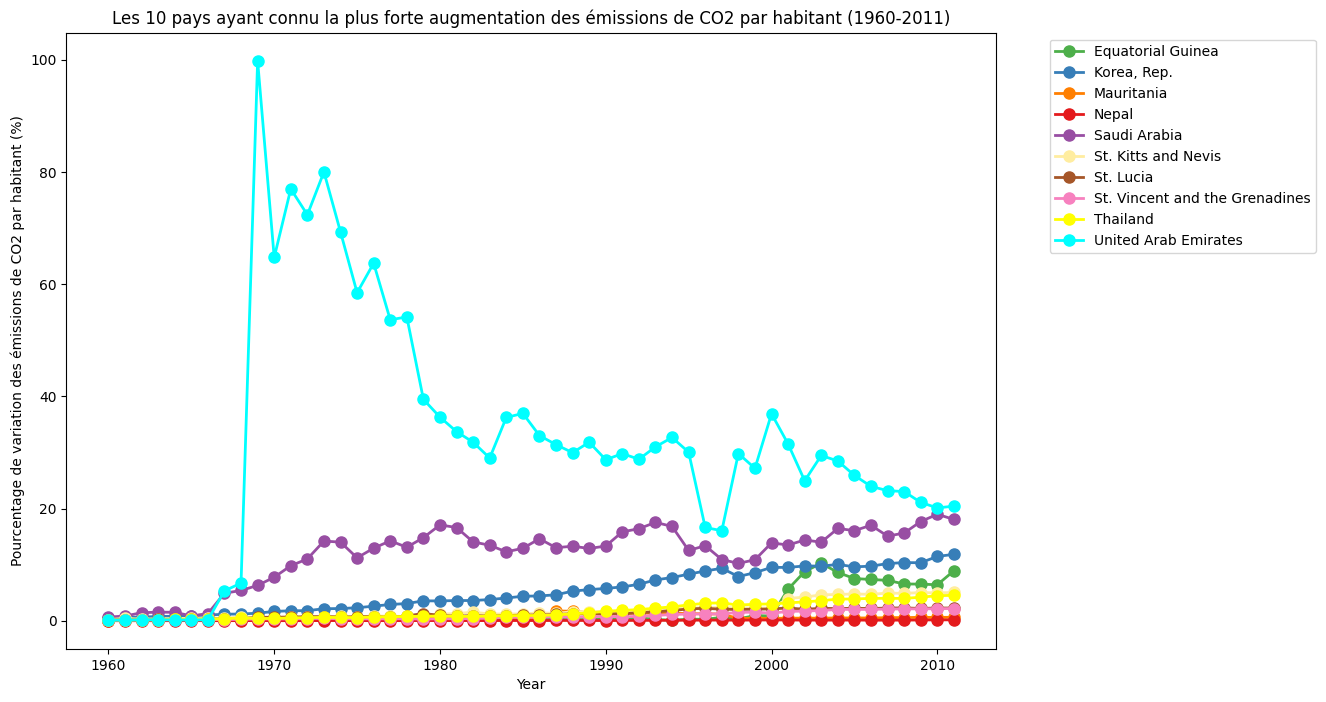

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Calculate the percentage change in CO2 emissions per capita for each country
df_pct_change = df.groupby('country_name')['co2'].apply(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100)

# Get the top 10 countries with the largest percentage increase
df_top_increase = df_pct_change.nlargest(10)

# Filter the original data to show only the top 10 countries
df_filtered = df[df['country_name'].isin(df_top_increase.index)]

# Pivot the data to create a line chart
df_pivot = df_filtered.pivot(index='year', columns='country_name', values='co2')

# Set the color scheme
colors = ["#4daf4a", "#377eb8", "#ff7f00", "#e41a1c", "#984ea3",
          "#ffeda0", "#a65628", "#f781bf",  "#FFFF00", "#00FFFF"]

# Set the font and style
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 12
plt.style.use('default')

# Create the line chart
fig, ax = plt.subplots(figsize=(12,8))
for col, color in zip(df_pivot.columns, colors):
    df_pivot[col].plot(ax=ax, linewidth=2, color=color, marker='o', markersize=8)

# Add labels and title
ax.set_xlabel("Year")
ax.set_ylabel("Pourcentage de variation des émissions de CO2 par habitant (%)")
ax.set_title("Les 10 pays ayant connu la plus forte augmentation des émissions de CO2 par habitant (1960-2011)")

# Add legend
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

# Set the background color to white
ax.set_facecolor('white')
fig.set_facecolor('white')

# Show the plot
plt.show()

# 5 : Quel est le continent qui émet le plus de co2 : Bart chart

In [ ]:
!pip install pycountry-convert

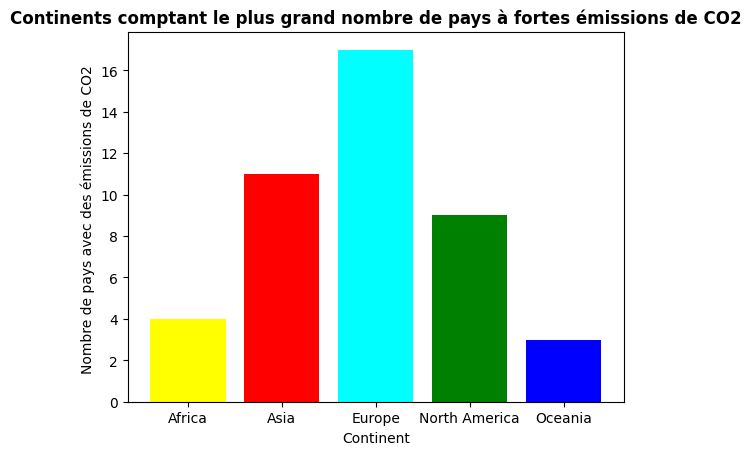

In [ ]:

import pandas as pd
import pycountry_convert as pc
import matplotlib.pyplot as plt


# define a function to get the continent of a country using the pycountry-convert library
def get_continent(country_code):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_code)
        continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        return pc.convert_continent_code_to_continent_name(continent_code)
    except:
        return None

# add a new column to the dataset with the continent information
df['continent'] = df['country_code'].apply(get_continent)

# set the threshold for high CO2 emissions (in metric tons per capita)
threshold = 10

# group the data by continent and count the number of countries with CO2 emissions above the threshold
df_grouped = df[df['co2'] > threshold].groupby(['continent'])['country_name'].nunique()


colors = ['yellow', 'red', 'cyan', 'green', 'blue', 'pink']

# create a bar plot
fig, ax = plt.subplots()
ax.bar(df_grouped.index, df_grouped.values, color=colors)

# add labels and title
ax.set_xlabel('Continent')
ax.set_ylabel('Nombre de pays avec des émissions de CO2 ', )
ax.set_title('Continents comptant le plus grand nombre de pays à fortes émissions de CO2', fontweight='bold', fontsize=12)


plt.show()


# 6: Quelles sont les années où la france a connu la plus forte diminution de ses émissions de co2 : Bar chart

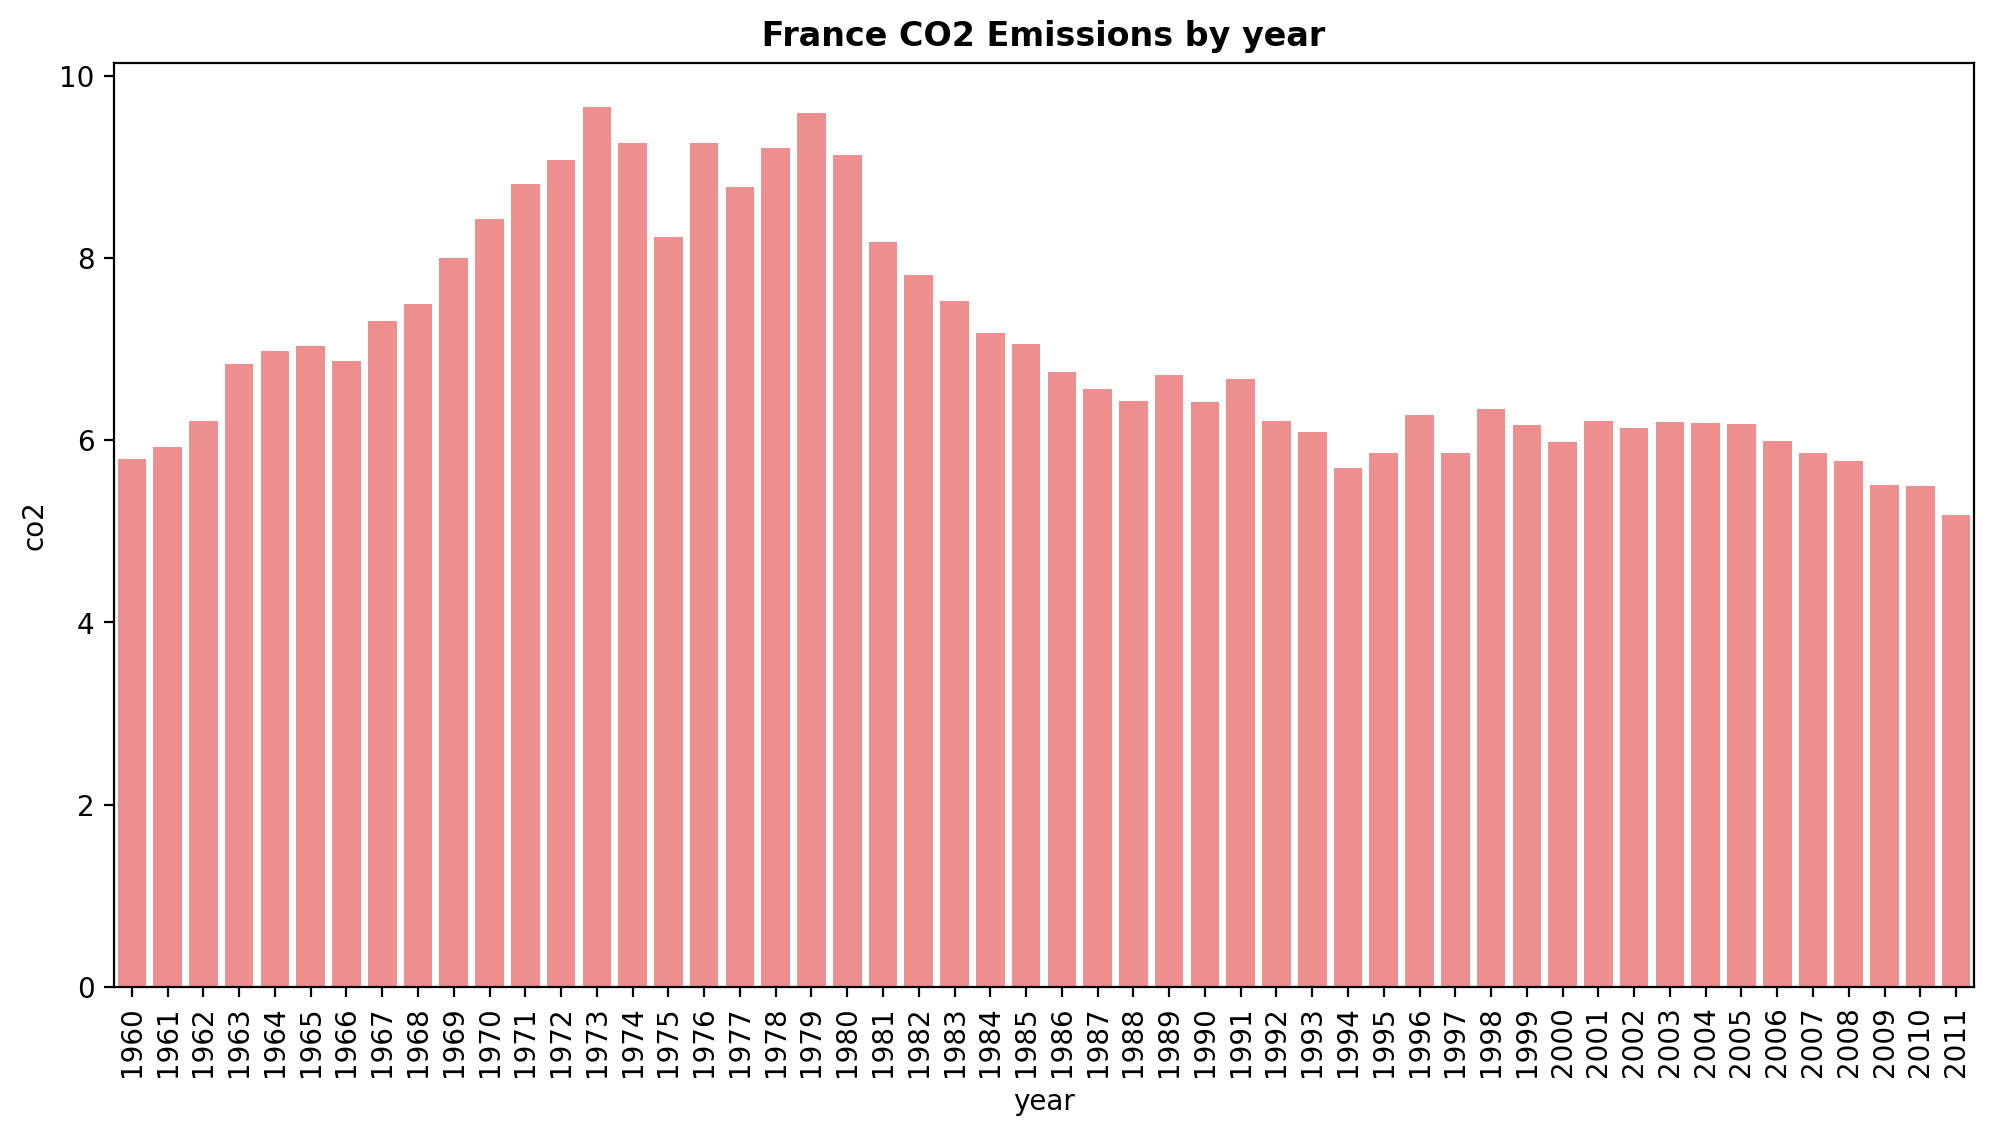

In [ ]:
df_france = df[(df.country_name == 'France' ) & ~(df.co2.isnull()  )]
#df_france.head()

france = df_france.sort_values(by = "co2", ascending = False )[:10]
from matplotlib import pyplot as plt
import seaborn as sns



co2 = df_france.co2
year = df_france.year

plt.figure(figsize=(12,6), dpi=200)
sns.barplot(x="year", 
            y="co2", 
            data=df_france,
            color="red",
            alpha=0.5)
plt.xticks(rotation=90)
plt.title(" France CO2 Emissions by year ",
          fontweight="bold")
plt.show()





# 7: les pays les plus pollueurs en matière de CO2 toutes années confondues

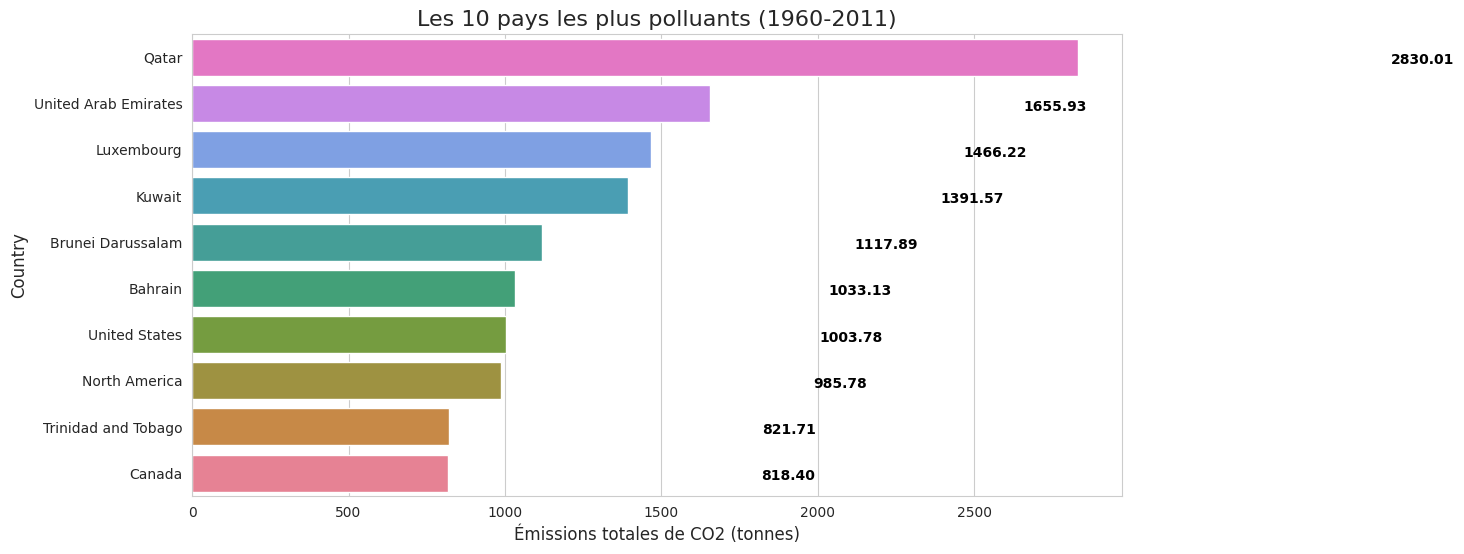

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



totals = df.groupby("country_name")["co2"].sum()


sorted_totals = totals.sort_values(ascending=False)[:10]

# Define a custom color palette with a unique color for each country
colors = sns.color_palette("husl", n_colors=len(sorted_totals)).as_hex()

# Create a horizontal bar chart with custom colors for each bar
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
ax = sns.barplot(x=sorted_totals.values, y=sorted_totals.index, palette=colors[::-1])


plt.title("Les 10 pays les plus polluants (1960-2011)", fontsize=16)
plt.xlabel("Émissions totales de CO2 (tonnes)", fontsize=12)
plt.ylabel("Country", fontsize=12)

# Add value labels to the bars
for i, v in enumerate(sorted_totals.values):
    ax.text(v + 1000, i + .15, "{:.2f}".format(v), color='black', fontweight='bold')


plt.show()
